In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
import shutil
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

2025-05-09 09:08:49.772701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746781730.007371      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746781730.081637      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os
import random
import shutil
from pathlib import Path

# Define the path to the dataset
dataset_path = '/kaggle/input/potatoblight/data'  # Update this path as per your dataset location
healthy_class = 'Healthy'  # Name of the healthy class folder

# Define the output directory where the balanced dataset will be saved
output_path = '/kaggle/working/balanced_dataset'
os.makedirs(output_path, exist_ok=True)

# Define the number of images to select, copies to create, and iterations
num_images_to_select = 10
num_copies = 10
num_iterations = 8

# Get the list of all classes (folders) in the dataset
all_classes = os.listdir(dataset_path)

# Copy all classes to the output directory (without modifying them)
for class_name in all_classes:
    class_path = os.path.join(dataset_path, class_name)
    output_class_path = os.path.join(output_path, class_name)
    os.makedirs(output_class_path, exist_ok=True)
    
    # Copy all images from the original class folder to the output folder
    for img in os.listdir(class_path):
        img_path = os.path.join(class_path, img)
        shutil.copy(img_path, output_class_path)

# Get the list of all healthy images
healthy_images_path = os.path.join(dataset_path, healthy_class)
healthy_images = [os.path.join(healthy_images_path, img) for img in os.listdir(healthy_images_path)]

# Perform the augmentation process for the healthy class
output_healthy_path = os.path.join(output_path, healthy_class)
for iteration in range(num_iterations):
    selected_images = random.sample(healthy_images, num_images_to_select)
    
    for img in selected_images:
        img_name = os.path.basename(img)
        img_name_without_ext, img_ext = os.path.splitext(img_name)
        
        for copy_num in range(num_copies):
            new_img_name = f"{img_name_without_ext}_copy_{iteration}_{copy_num}{img_ext}"
            new_img_path = os.path.join(output_healthy_path, new_img_name)
            shutil.copy(img, new_img_path)

print(f"Balanced dataset created at: {output_path}")

Balanced dataset created at: /kaggle/working/balanced_dataset


In [3]:
import shutil

# Zip the folder (replace 'folder_name' with your actual folder)
shutil.make_archive('balanced_dataset', 'zip', 'balanced_dataset')


'/kaggle/working/balanced_dataset.zip'

In [5]:
from IPython.display import FileLink
FileLink('balanced_dataset.zip')


/kaggle/working/balanced_dataset.zip

In [3]:
# Set dataset directory
DATASET_PATH = "/kaggle/working/balanced_dataset"
BATCH_SIZE = 32

In [4]:
# Define categories
CATEGORIES = {"Early Blight": "Early Blight", "Late Blight": "Late Blight", "Healthy": "Healthy"}
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 45

In [5]:
# Define models and their preprocessing functions
MODELS = {
    "VGG16": (VGG16, vgg_preprocess, (224, 224)),
    "ResNet50": (ResNet50, resnet_preprocess, (224, 224)),
    "DenseNet121": (DenseNet121, densenet_preprocess, (224, 224)),
    "InceptionV3": (InceptionV3, inception_preprocess, (299, 299)),
    "EfficientNetB0": (EfficientNetB0, efficientnet_preprocess, (224, 224)),
    

}


Training VGG16...
Found 2362 images belonging to 3 classes.
Found 590 images belonging to 3 classes.


I0000 00:00:1745911859.349173      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745911859.350031      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/45


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745911866.832712     110 service.cc:148] XLA service 0x7d90b800de70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745911866.833645     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745911866.833672     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745911867.219652     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/74 ━━━━━━━━━━━━━━━━━━━━ 19:13 16s/step - accuracy: 0.3438 - loss: 2.9755

I0000 00:00:1745911877.785218     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 60s 607ms/step - accuracy: 0.7307 - loss: 1.2182 - val_accuracy: 0.9271 - val_loss: 0.1965
Epoch 2/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 389ms/step - accuracy: 0.9450 - loss: 0.1674 - val_accuracy: 0.9305 - val_loss: 0.1498
Epoch 3/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 392ms/step - accuracy: 0.9542 - loss: 0.1269 - val_accuracy: 0.9373 - val_loss: 0.1616
Epoch 4/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 387ms/step - accuracy: 0.9615 - loss: 0.1082 - val_accuracy: 0.9254 - val_loss: 0.2251
Epoch 5/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 392ms/step - accuracy: 0.9638 - loss: 0.0990 - val_accuracy: 0.9339 - val_loss: 0.1571
Epoch 6/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 390ms/step - accuracy: 0.9712 - loss: 0.0812 - val_accuracy: 0.9508 - val_loss: 0.1093
Epoch 7/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 391ms/step - accuracy: 0.9633 - loss: 0.0953 - val_accuracy: 0.9085 - val_loss: 0.2601
Epoch 8/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 392ms/step - accuracy: 0.9675 - loss: 0.1101 - val_accuracy: 0.920

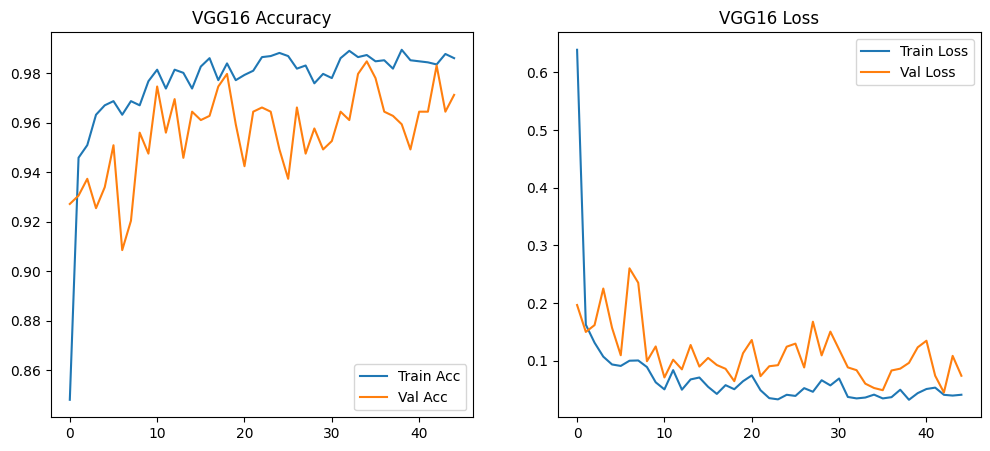

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step


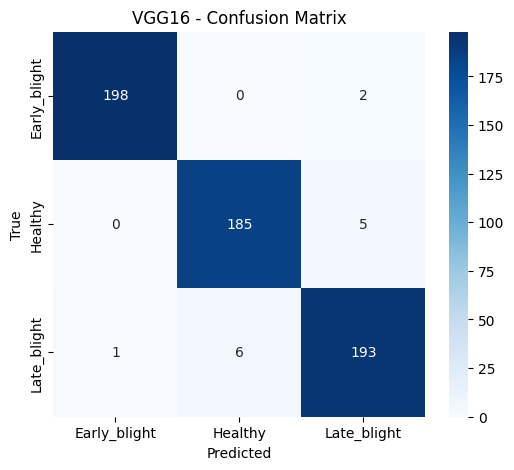

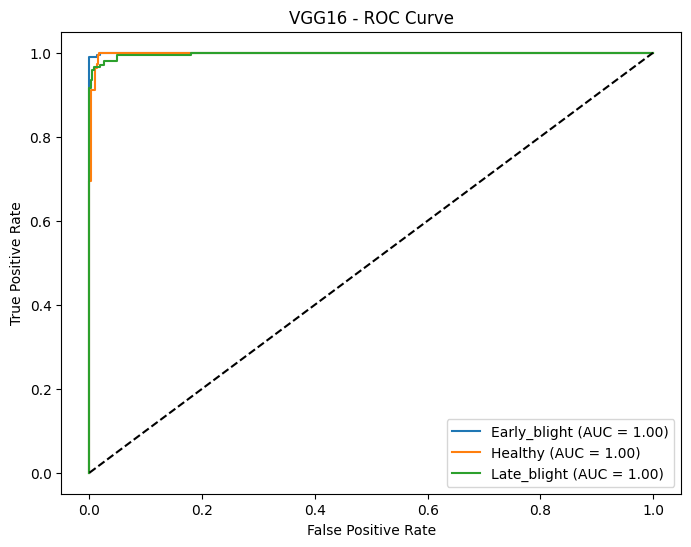

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


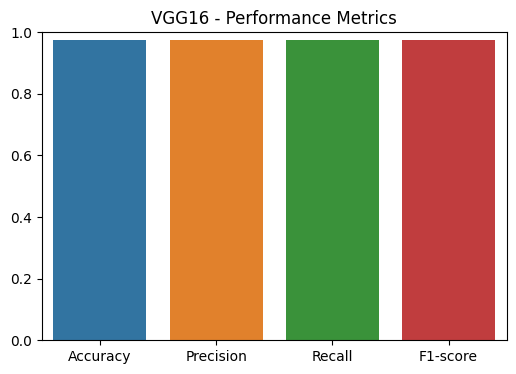


VGG16 Evaluation Metrics:
Accuracy  : 0.9763
Precision : 0.9763
Recall    : 0.9763
F1-Score  : 0.9763

Training ResNet50...
Found 2362 images belonging to 3 classes.
Found 590 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/45


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 58s 548ms/step - accuracy: 0.7961 - loss: 0.7105 - val_accuracy: 0.9237 - val_loss: 0.2249
Epoch 2/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 377ms/step - accuracy: 0.9608 - loss: 0.0990 - val_accuracy: 0.9525 - val_loss: 0.2279
Epoch 3/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 378ms/step - accuracy: 0.9767 - loss: 0.0594 - val_accuracy: 0.9559 - val_loss: 0.0996
Epoch 4/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 374ms/step - accuracy: 0.9762 - loss: 0.0550 - val_accuracy: 0.9424 - val_loss: 0.1941
Epoch 5/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 380ms/step - accuracy: 0.9849 - loss: 0.0466 - val_accuracy: 0.9576 - val_loss: 0.1186
Epoch 6/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 375ms/step - accuracy: 0.9855 - loss: 0.0370 - val_accuracy: 0.9576 - val_loss: 0.1173
Epoch 7/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - accuracy: 0.9883 - loss: 0.0281 - val_accuracy: 0.9763 - val_loss: 0.0587
Epoch 8/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - accuracy: 0.9843 - loss: 0.0347 - val_accuracy: 0.955

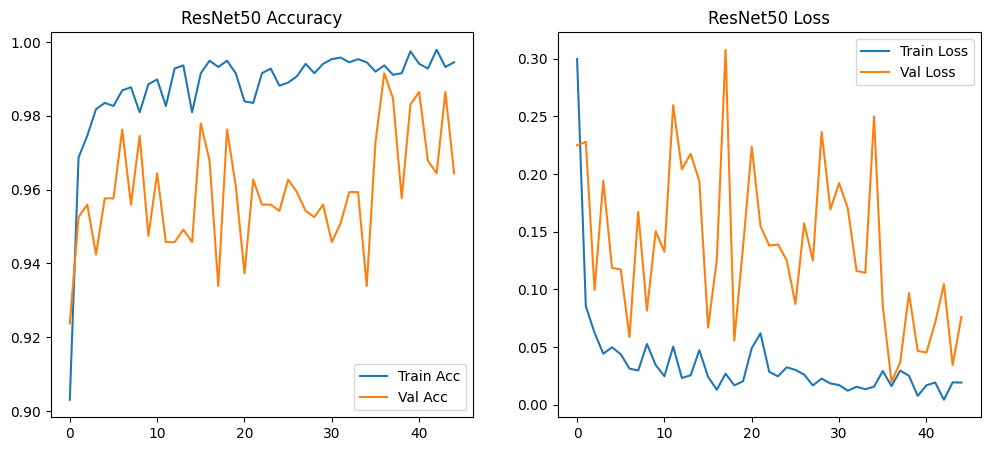

19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 529ms/step


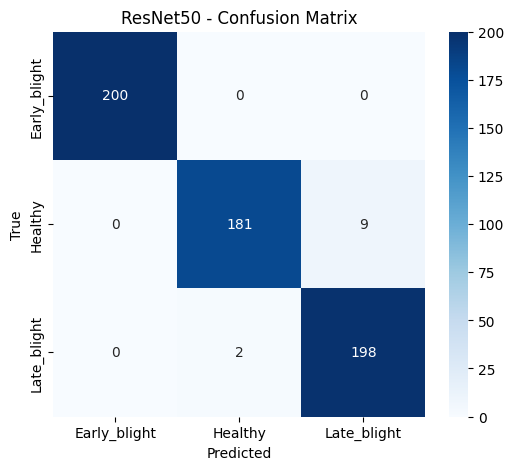

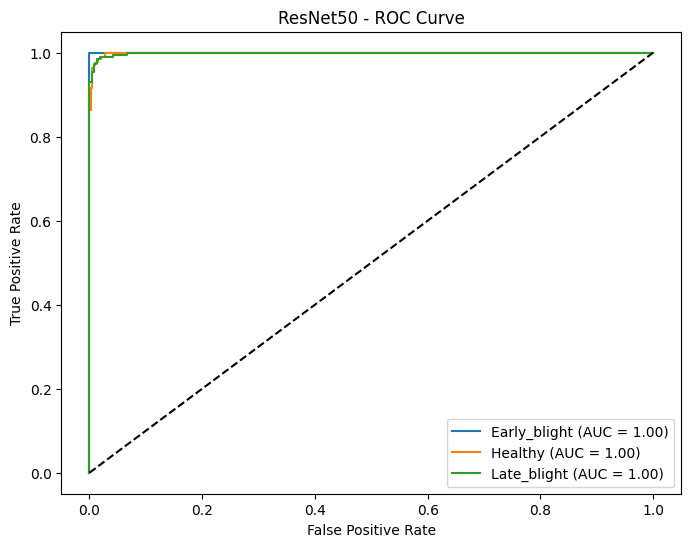

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


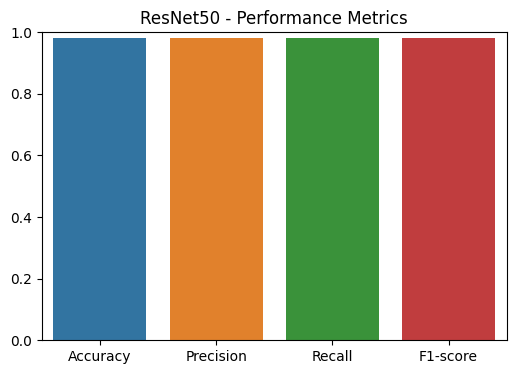


ResNet50 Evaluation Metrics:
Accuracy  : 0.9814
Precision : 0.9817
Recall    : 0.9814
F1-Score  : 0.9813

Training DenseNet121...
Found 2362 images belonging to 3 classes.
Found 590 images belonging to 3 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/45


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 96s 843ms/step - accuracy: 0.7586 - loss: 0.6264 - val_accuracy: 0.9136 - val_loss: 0.2194
Epoch 2/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 389ms/step - accuracy: 0.9591 - loss: 0.1282 - val_accuracy: 0.9458 - val_loss: 0.1375
Epoch 3/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 387ms/step - accuracy: 0.9704 - loss: 0.0885 - val_accuracy: 0.9475 - val_loss: 0.1089
Epoch 4/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 390ms/step - accuracy: 0.9733 - loss: 0.0711 - val_accuracy: 0.9593 - val_loss: 0.0893
Epoch 5/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 388ms/step - accuracy: 0.9719 - loss: 0.0798 - val_accuracy: 0.9797 - val_loss: 0.0595
Epoch 6/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 388ms/step - accuracy: 0.9791 - loss: 0.0578 - val_accuracy: 0.9814 - val_loss: 0.0556
Epoch 7/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 387ms/step - accuracy: 0.9794 - loss: 0.0484 - val_accuracy: 0.9678 - val_loss: 0.0773
Epoch 8/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 385ms/step - accuracy: 0.9719 - loss: 0.0672 - val_accuracy: 0.983

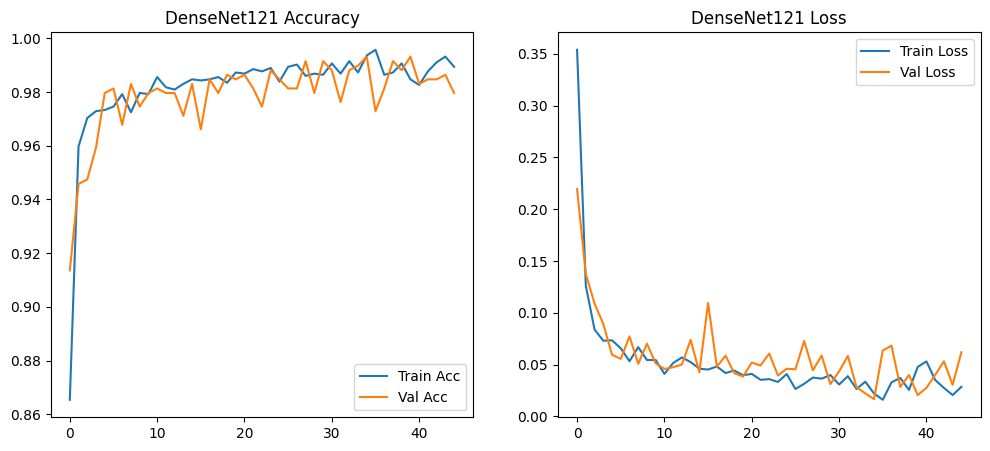

19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 930ms/step


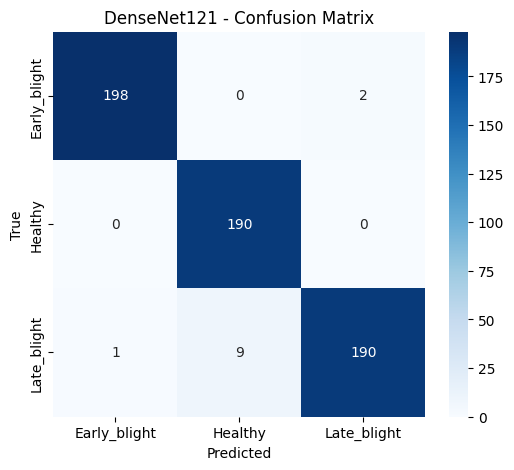

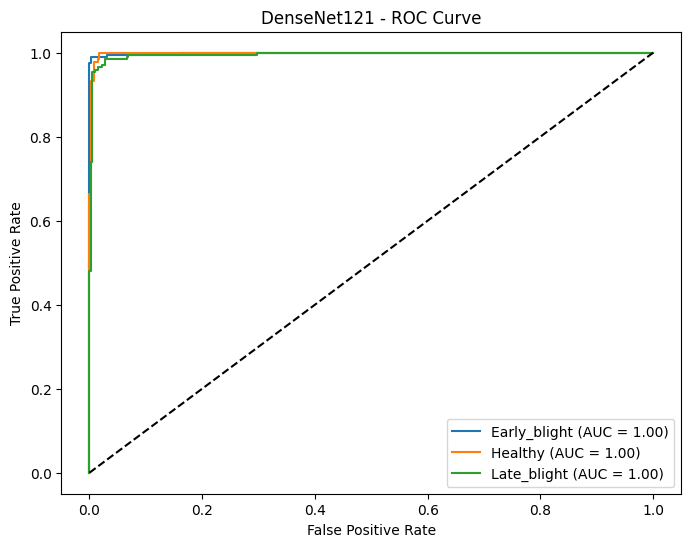

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


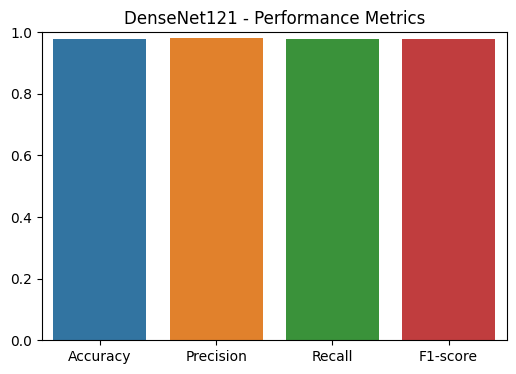


DenseNet121 Evaluation Metrics:
Accuracy  : 0.9797
Precision : 0.9802
Recall    : 0.9797
F1-Score  : 0.9796

Training InceptionV3...
Found 2362 images belonging to 3 classes.
Found 590 images belonging to 3 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/45


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6681 - loss: 0.8770 - val_accuracy: 0.8695 - val_loss: 0.2728
Epoch 2/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 56s 698ms/step - accuracy: 0.8979 - loss: 0.2654 - val_accuracy: 0.9068 - val_loss: 0.2128
Epoch 3/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 56s 702ms/step - accuracy: 0.9416 - loss: 0.1730 - val_accuracy: 0.9034 - val_loss: 0.2312
Epoch 4/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 57s 708ms/step - accuracy: 0.9217 - loss: 0.1922 - val_accuracy: 0.8797 - val_loss: 0.3464
Epoch 5/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 56s 708ms/step - accuracy: 0.9372 - loss: 0.1819 - val_accuracy: 0.9119 - val_loss: 0.2438
Epoch 6/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 56s 703ms/step - accuracy: 0.9261 - loss: 0.1935 - val_accuracy: 0.9085 - val_loss: 0.1999
Epoch 7/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 56s 697ms/step - accuracy: 0.9497 - loss: 0.1345 - val_accuracy: 0.8966 - val_loss: 0.2384
Epoch 8/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 56s 708ms/step - accuracy: 0.9422 - loss: 0.1500 - val_accuracy: 0.9305 

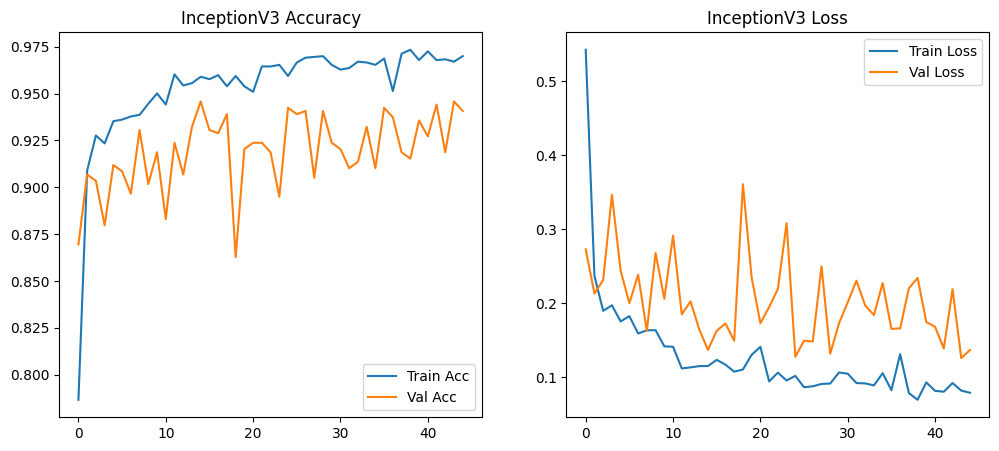

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 856ms/step


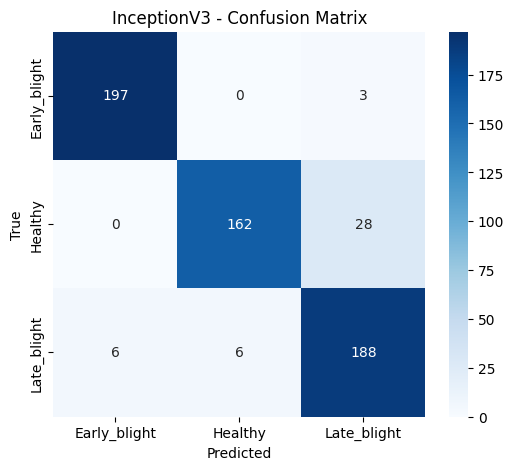

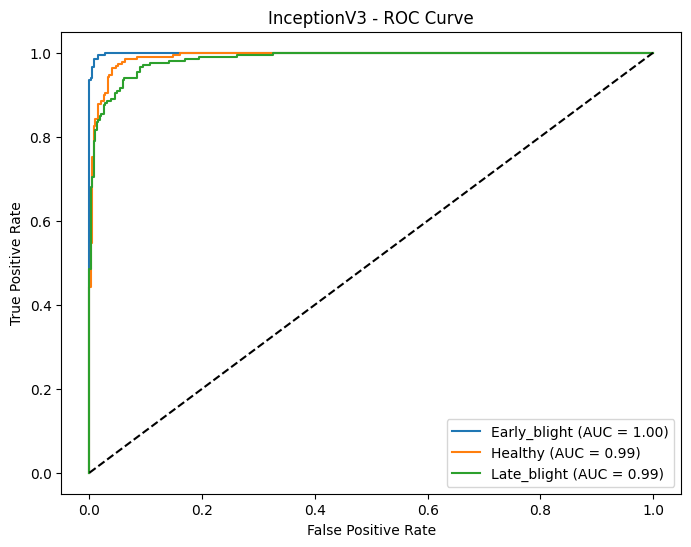

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


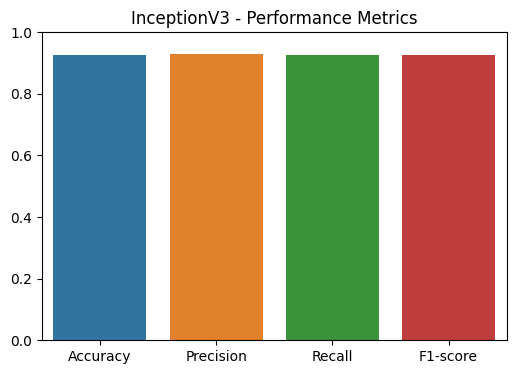


InceptionV3 Evaluation Metrics:
Accuracy  : 0.9271
Precision : 0.9305
Recall    : 0.9271
F1-Score  : 0.9271

Training EfficientNetB0...
Found 2362 images belonging to 3 classes.
Found 590 images belonging to 3 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/45


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 76s 654ms/step - accuracy: 0.8264 - loss: 0.3990 - val_accuracy: 0.9610 - val_loss: 0.0989
Epoch 2/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 366ms/step - accuracy: 0.9728 - loss: 0.0705 - val_accuracy: 0.9864 - val_loss: 0.0506
Epoch 3/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 363ms/step - accuracy: 0.9767 - loss: 0.0623 - val_accuracy: 0.9831 - val_loss: 0.0456
Epoch 4/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 369ms/step - accuracy: 0.9757 - loss: 0.0773 - val_accuracy: 0.9797 - val_loss: 0.0504
Epoch 5/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 365ms/step - accuracy: 0.9895 - loss: 0.0459 - val_accuracy: 0.9949 - val_loss: 0.0280
Epoch 6/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 367ms/step - accuracy: 0.9704 - loss: 0.0574 - val_accuracy: 0.9797 - val_loss: 0.0566
Epoch 7/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 362ms/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.9881 - val_loss: 0.0308
Epoch 8/45
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 365ms/step - accuracy: 0.9873 - loss: 0.0418 - val_accuracy: 0.986

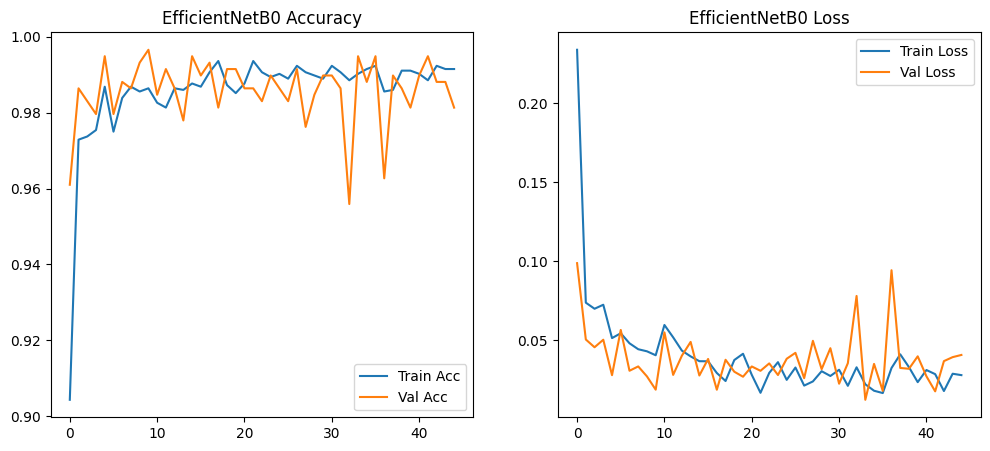

19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 626ms/step


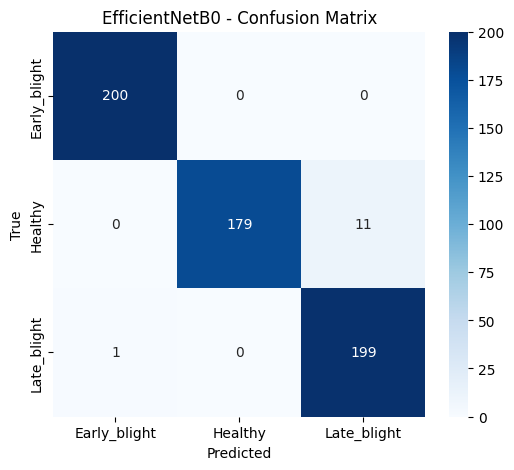

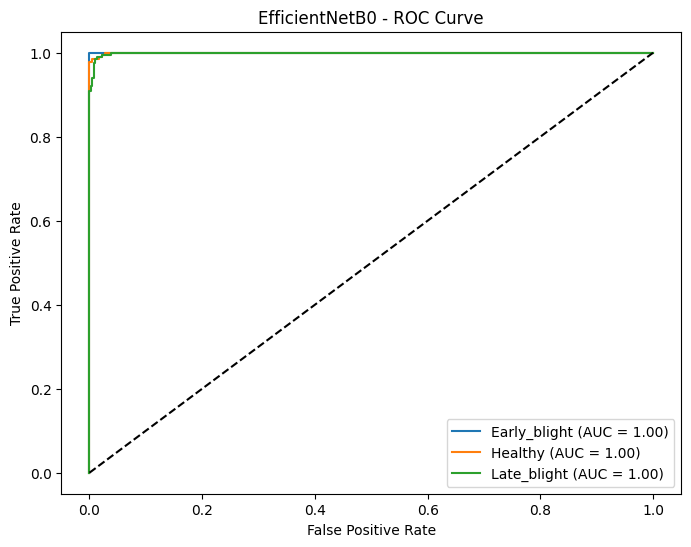

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


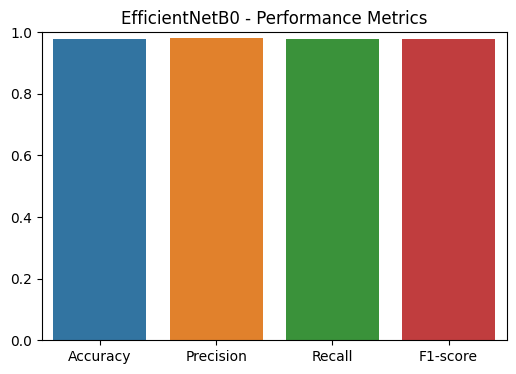


EfficientNetB0 Evaluation Metrics:
Accuracy  : 0.9797
Precision : 0.9806
Recall    : 0.9797
F1-Score  : 0.9796


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.utils import to_categorical

results = {}

for model_name, (ModelClass, preprocess_func, img_size) in MODELS.items():
    print(f"\nTraining {model_name}...")

    # Data generators
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_func,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        DATASET_PATH, target_size=img_size, batch_size=BATCH_SIZE, class_mode='categorical', subset='training', shuffle=True, seed=42)
    val_generator = train_datagen.flow_from_directory(
        DATASET_PATH, target_size=img_size, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation', shuffle=False)

    # Load base model
    base_model = ModelClass(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
    for layer in base_model.layers:
        layer.trainable = False

    # Custom head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator)

    # Plot accuracy/loss curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f"{model_name} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{model_name} Loss")
    plt.legend()
    plt.show()

    # Evaluation
    val_generator.reset()
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())

    # Accuracy and classification report
    report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred_classes)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    y_true_categorical = to_categorical(y_true, num_classes=3)
    plt.figure(figsize=(8, 6))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_true_categorical[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Bar Plot for metrics
    metrics_to_plot = ['precision', 'recall', 'f1-score']
    values = [report['weighted avg'][metric] for metric in metrics_to_plot]
    values.insert(0, accuracy)  # insert accuracy at beginning
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1-score'], y=values)
    plt.ylim(0, 1)
    plt.title(f'{model_name} - Performance Metrics')
    plt.show()

    # Print metrics
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {report['weighted avg']['precision']:.4f}")
    print(f"Recall    : {report['weighted avg']['recall']:.4f}")
    print(f"F1-Score  : {report['weighted avg']['f1-score']:.4f}")


    # Save results
    results[model_name] = {
        "accuracy": accuracy,
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }

    model.save(f"potato_blight_{model_name.lower()}.h5")


In [8]:
from tensorflow.keras.models import load_model

for model_name, (_, preprocess_func, img_size) in MODELS.items():
    print(f"\nLoading {model_name} model...")

    # Load the saved model
    model = load_model(f"potato_blight_{model_name.lower()}.h5")

    # Ensure correct image preprocessing and resizing
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_func, validation_split=0.2)
    val_generator = val_datagen.flow_from_directory(
        DATASET_PATH, target_size=img_size, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation', shuffle=False)

    # Evaluate model
    val_generator.reset()
    y_true = np.array([train_generator.class_indices[class_name.split('/')[0]] for class_name in val_generator.filenames])
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    overall_accuracy = accuracy_score(y_true, y_pred_classes)
    report = classification_report(y_true, y_pred_classes, target_names=list(CATEGORIES.values()), output_dict=True)

    # Store results
    results[model_name] = {
        "accuracy": overall_accuracy,
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }

# Print final results
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Loading VGG16 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step

Loading ResNet50 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step

Loading DenseNet121 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 546ms/step

Loading InceptionV3 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step

Loading EfficientNetB0 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step

Model Comparison:
                accuracy  precision    recall  f1-score
VGG16           0.969492   0.971097  0.969492  0.969686
ResNet50        0.996610   0.996619  0.996610  0.996610
DenseNet121     0.981356   0.981674  0.981356  0.981359
InceptionV3     0.889831   0.915033  0.889831  0.887455
EfficientNetB0  0.950847   0.956484  0.950847  0.950777



Loading VGG16 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step


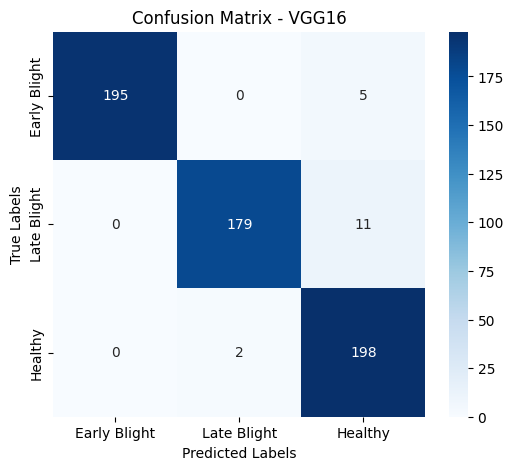

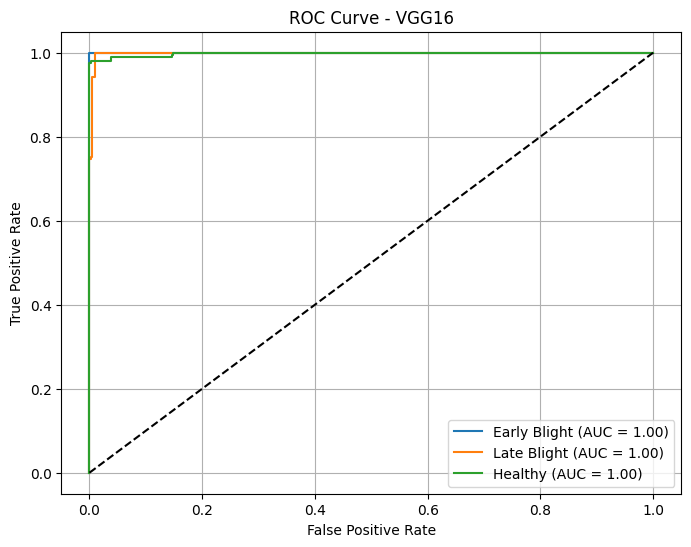

Note: Cannot plot training/validation loss and accuracy for VGG16 (training history not saved in .h5)

Loading ResNet50 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step


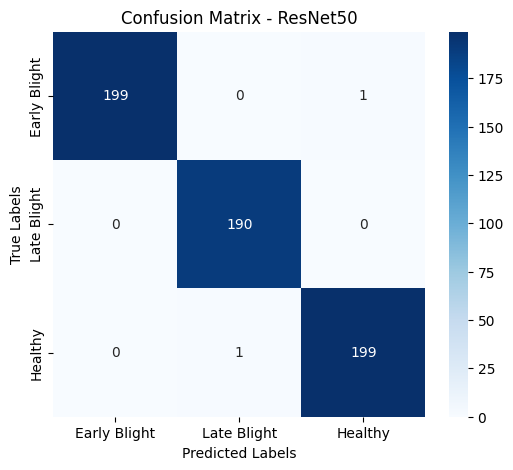

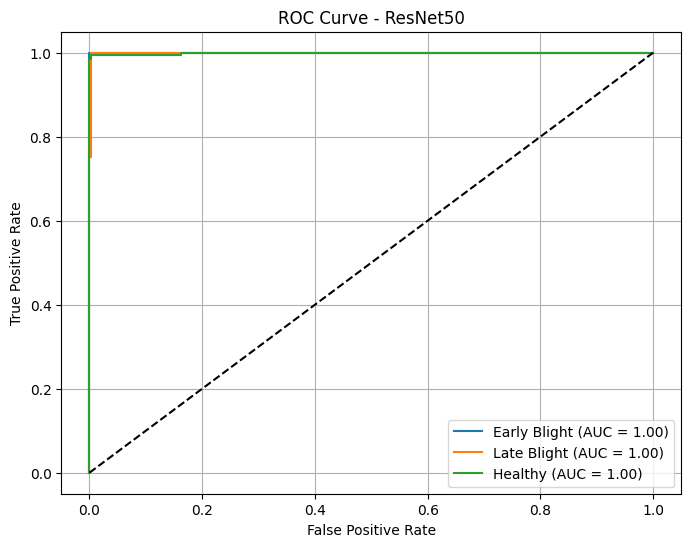

Note: Cannot plot training/validation loss and accuracy for ResNet50 (training history not saved in .h5)

Loading DenseNet121 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 545ms/step


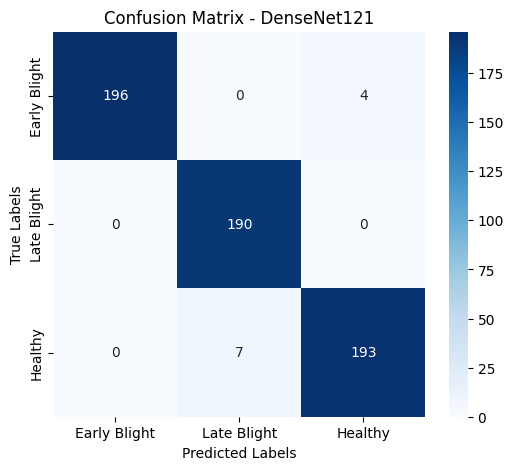

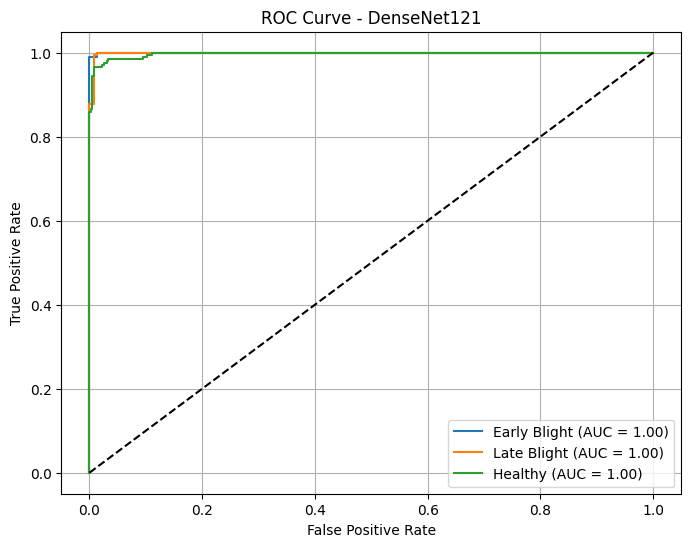

Note: Cannot plot training/validation loss and accuracy for DenseNet121 (training history not saved in .h5)

Loading InceptionV3 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 372ms/step


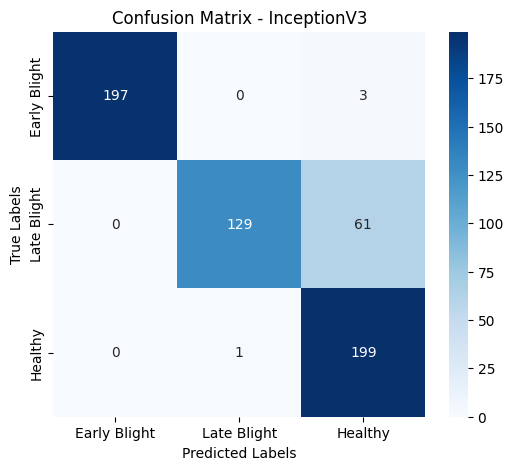

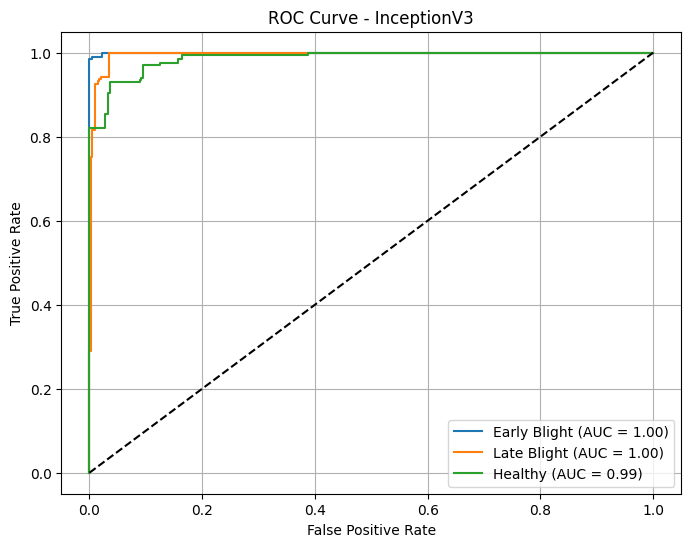

Note: Cannot plot training/validation loss and accuracy for InceptionV3 (training history not saved in .h5)

Loading EfficientNetB0 model...
Found 590 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 372ms/step


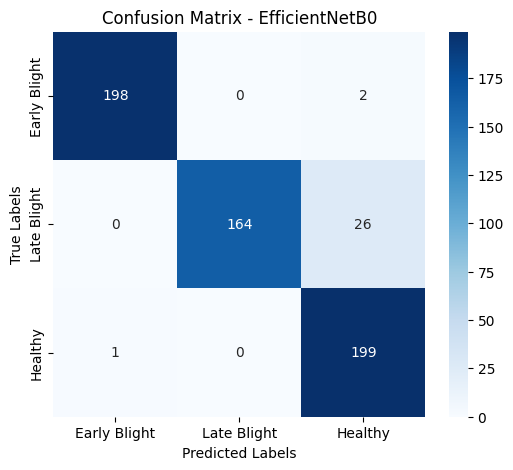

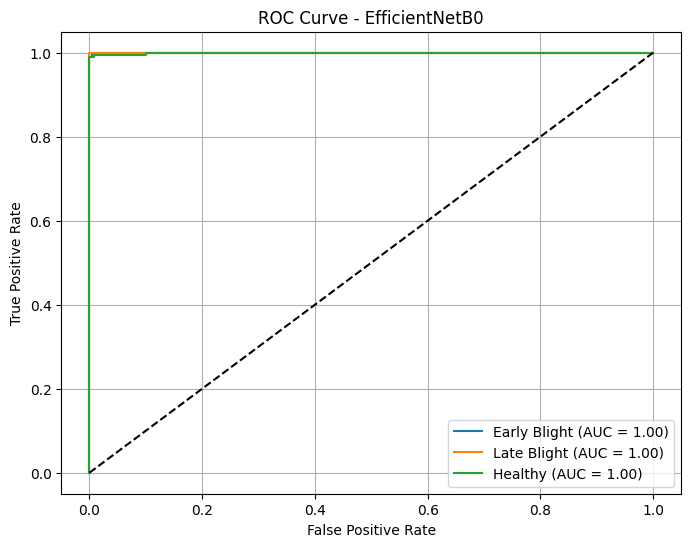

Note: Cannot plot training/validation loss and accuracy for EfficientNetB0 (training history not saved in .h5)

Model Comparison:
                accuracy  precision    recall  f1-score
VGG16           0.969492   0.971097  0.969492  0.969686
ResNet50        0.996610   0.996619  0.996610  0.996610
DenseNet121     0.981356   0.981674  0.981356  0.981359
InceptionV3     0.889831   0.915033  0.889831  0.887455
EfficientNetB0  0.950847   0.956484  0.950847  0.950777


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import numpy as np
import pandas as pd

results = {}

for model_name, (ModelClass, preprocess_func, img_size) in MODELS.items():
    print(f"\nLoading {model_name} model...")

    # Load the saved model
    model = load_model(f"potato_blight_{model_name.lower()}.h5")

    # Prepare validation generator
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_func, validation_split=0.2)
    val_generator = val_datagen.flow_from_directory(
        DATASET_PATH, target_size=img_size, batch_size=BATCH_SIZE,
        class_mode='categorical', subset='validation', shuffle=False)

    # Predict
    val_generator.reset()
    y_true = np.array([val_generator.class_indices[class_name.split('/')[0]] for class_name in val_generator.filenames])
    y_pred_probs = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Accuracy, Precision, Recall, F1
    overall_accuracy = accuracy_score(y_true, y_pred_classes)
    report = classification_report(y_true, y_pred_classes, target_names=list(CATEGORIES.values()), output_dict=True)

    # Save Results
    results[model_name] = {
        "accuracy": overall_accuracy,
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }

    # ---------------- PLOTS START ----------------

    # 1. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES.values(), yticklabels=CATEGORIES.values())
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # 2. ROC Curve
    plt.figure(figsize=(8,6))
    n_classes = len(CATEGORIES)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_true_onehot = np.eye(n_classes)[y_true]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{list(CATEGORIES.values())[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # NOTE: Loss curve and accuracy curve from 'history' is NOT possible now
    # because model.h5 does NOT save training history
    # Only structure + weights are saved
    # Hence Loss/Accuracy vs Epochs can't be plotted unless retraining done
    print(f"Note: Cannot plot training/validation loss and accuracy for {model_name} (training history not saved in .h5)")

# Final results table
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib


In [13]:
# Set dataset directory
DATASET_PATH = "/kaggle/working/balanced_dataset"
BATCH_SIZE = 32

In [14]:
# Data generator setup (no augmentation, just rescaling)
data_gen_224 = ImageDataGenerator(rescale=1./255, validation_split=0.2)
data_gen_299 = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen_224 = data_gen_224.flow_from_directory(
    DATASET_PATH, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode='categorical', subset='validation', shuffle=False)
val_gen_299 = data_gen_299.flow_from_directory(
    DATASET_PATH, target_size=(299, 299), batch_size=BATCH_SIZE, class_mode='categorical', subset='validation', shuffle=False)


Found 590 images belonging to 3 classes.
Found 590 images belonging to 3 classes.


In [28]:
# Load trained models
vgg_model = load_model("/kaggle/working/potato_blight_vgg16.h5")
inception_model = load_model("/kaggle/working/potato_blight_inceptionv3.h5")
efficientnet_model = load_model("/kaggle/working/potato_blight_efficientnetb0.h5")
densenet_model = load_model("/kaggle/working/potato_blight_densenet121.h5")

In [36]:
# Generate softmax predictions from each model on validation data
y_val = val_gen_224.classes
vgg_preds = vgg_model.predict(val_gen_224)
inception_preds = inception_model.predict(val_gen_299)
efficientnet_preds = efficientnet_model.predict(val_gen_224)
#densenet_preds = densenet_model.predict(val_gen_224)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [37]:
# Concatenate predictions as features for stacking
X_stack = np.concatenate([vgg_preds, inception_preds, efficientnet_preds], axis=1)


In [38]:
# Split stacking data to avoid overfitting
X_train_stack, X_test_stack, y_train_stack, y_test_stack = train_test_split(X_stack, y_val, test_size=0.3, random_state=42, stratify=y_val)


In [39]:
# Define meta-classifiers (replaced Gradient Boosting with AdaBoost)
meta_classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

In [40]:
# Train and evaluate each meta-classifier
results = {}
for name, clf in meta_classifiers.items():
    print(f"\nTraining {name} as meta-classifier...")
    clf.fit(X_train_stack, y_train_stack)
    y_pred = clf.predict(X_test_stack)
    accuracy = accuracy_score(y_test_stack, y_pred)
    report = classification_report(y_test_stack, y_pred, target_names=list(val_gen_224.class_indices.keys()))
    results[name] = accuracy

    joblib.dump(clf, f"softmax_stacking_{name.lower().replace(' ', '_')}.pkl")

    print(f"\n{name} Performance (Softmax-Based):")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)



Training Random Forest as meta-classifier...

Random Forest Performance (Softmax-Based):
Accuracy: 0.9831
              precision    recall  f1-score   support

Early_blight       0.98      0.98      0.98        60
     Healthy       0.98      1.00      0.99        57
 Late_blight       0.98      0.97      0.97        60

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177


Training Logistic Regression as meta-classifier...

Logistic Regression Performance (Softmax-Based):
Accuracy: 0.9831
              precision    recall  f1-score   support

Early_blight       1.00      0.97      0.98        60
     Healthy       1.00      0.98      0.99        57
 Late_blight       0.95      1.00      0.98        60

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177


Training SV


Training Random Forest as meta-classifier...

Random Forest Performance (Softmax-Based):
Accuracy: 0.9831
              precision    recall  f1-score   support

Early_blight       0.98      0.98      0.98        60
     Healthy       0.98      1.00      0.99        57
 Late_blight       0.98      0.97      0.97        60

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177



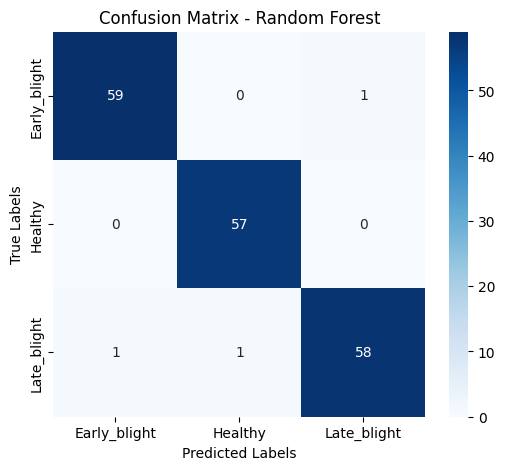


Training Logistic Regression as meta-classifier...

Logistic Regression Performance (Softmax-Based):
Accuracy: 0.9831
              precision    recall  f1-score   support

Early_blight       1.00      0.97      0.98        60
     Healthy       1.00      0.98      0.99        57
 Late_blight       0.95      1.00      0.98        60

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177



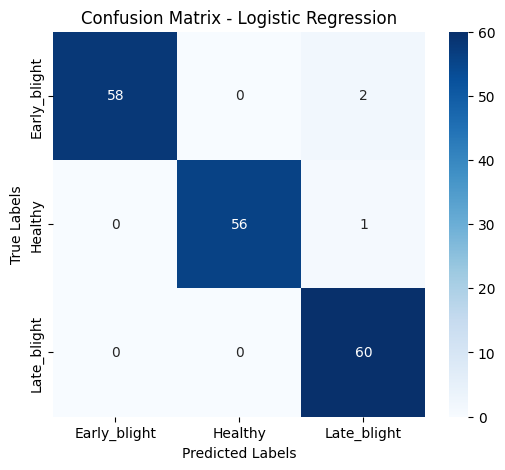


Training SVM as meta-classifier...

SVM Performance (Softmax-Based):
Accuracy: 0.9831
              precision    recall  f1-score   support

Early_blight       1.00      0.97      0.98        60
     Healthy       1.00      0.98      0.99        57
 Late_blight       0.95      1.00      0.98        60

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177



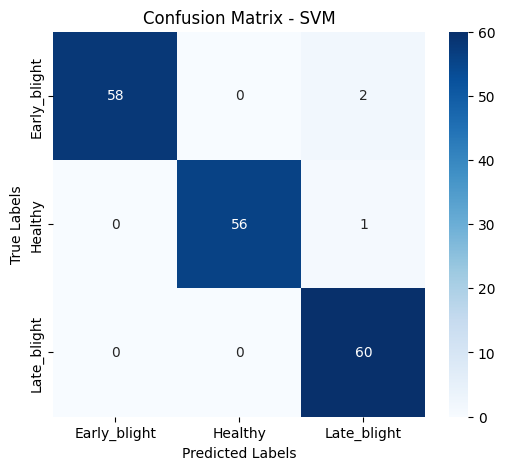


Training AdaBoost as meta-classifier...

AdaBoost Performance (Softmax-Based):
Accuracy: 0.9322
              precision    recall  f1-score   support

Early_blight       1.00      0.98      0.99        60
     Healthy       0.94      0.86      0.90        57
 Late_blight       0.86      0.95      0.90        60

    accuracy                           0.93       177
   macro avg       0.94      0.93      0.93       177
weighted avg       0.94      0.93      0.93       177



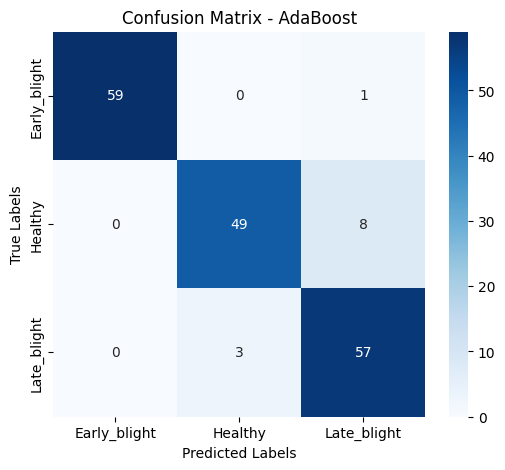


Meta-Classifier Metrics Comparison (Softmax-Based):
                     accuracy  precision    recall  f1-score
Random Forest        0.983051   0.983052  0.983051  0.983004
Logistic Regression  0.983051   0.983858  0.983051  0.983137
SVM                  0.983051   0.983858  0.983051  0.983137
AdaBoost             0.932203   0.935196  0.932203  0.932368


In [41]:
results = {}
for name, clf in meta_classifiers.items():
    print(f"\nTraining {name} as meta-classifier...")
    clf.fit(X_train_stack, y_train_stack)
    y_pred = clf.predict(X_test_stack)
    accuracy = accuracy_score(y_test_stack, y_pred)
    report = classification_report(y_test_stack, y_pred, target_names=list(val_gen_224.class_indices.keys()), output_dict=True)

    results[name] = {
        "accuracy": accuracy,
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }

    joblib.dump(clf, f"softmax_stacking_{name.lower().replace(' ', '_')}.pkl")

    print(f"\n{name} Performance (Softmax-Based):")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_stack, y_pred, target_names=list(val_gen_224.class_indices.keys())))

    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_test_stack, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen_224.class_indices.keys(), yticklabels=val_gen_224.class_indices.keys())
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Final comparison
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nMeta-Classifier Metrics Comparison (Softmax-Based):")
print(results_df)
